## SPOTIFY DATASET
### Комплексный анализ датасета, поиск новых признаков
#### Участники: Городничев Иван Сергеевич - РИ-230911 - 09.03.01
#### Порсев Михаил Владимирович - РИ-230911 - 09.03.01
#### Славкин Евгений Евгеньевич - РИ-230911 - 09.03.01
#### Букреев Владислав Андреевич - РИ-230911 - 09.03.01
#### Бушуев Арсений Олегович - РИ-230911 - 09.03.01

#### Блок с необходимыми библиотеками

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

#### Считываем csvшник

In [2]:
soundframe = pd.read_csv('dataset.csv')

In [3]:
soundframe.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Датасет разбит на жанры, содержит такие значимые параметры как имя артиста, название альбома, параметр популярности, длительности, наличие нецензурной лексики, музыкальные параметры выраженные численно, количество долей и жанр песни.

In [4]:
soundframe.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Взглянем на общее количество жанров - 

In [5]:
soundframe['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

Для будущих экспериментов разобьём датасет на отдельные датафреймы по жанру

In [19]:
sf_acoustic = soundframe[soundframe['track_genre'] == 'acoustic']
sf_afrobeat = soundframe[soundframe['track_genre'] == 'afrobeat']
sf_alt_rock = soundframe[soundframe['track_genre'] == 'alt-rock']
sf_alternative = soundframe[soundframe['track_genre'] == 'alternative']
sf_ambient = soundframe[soundframe['track_genre'] == 'ambient']
sf_anime = soundframe[soundframe['track_genre'] == 'anime']
sf_black_metal = soundframe[soundframe['track_genre'] == 'black-metal']
sf_bluegrass = soundframe[soundframe['track_genre'] == 'bluegrass']
sf_blues = soundframe[soundframe['track_genre'] == 'blues']
sf_brazil = soundframe[soundframe['track_genre'] == 'brazil']
sf_breakbeat = soundframe[soundframe['track_genre'] == 'breakbeat']
sf_british = soundframe[soundframe['track_genre'] == 'british']
sf_cantopop = soundframe[soundframe['track_genre'] == 'cantopop']
sf_chicago_house = soundframe[soundframe['track_genre'] == 'chicago-house']
sf_children = soundframe[soundframe['track_genre'] == 'children']
sf_chill = soundframe[soundframe['track_genre'] == 'chill']
sf_classical = soundframe[soundframe['track_genre'] == 'classical']
sf_club = soundframe[soundframe['track_genre'] == 'club']
sf_comedy = soundframe[soundframe['track_genre'] == 'comedy']
sf_country = soundframe[soundframe['track_genre'] == 'country']
sf_dance = soundframe[soundframe['track_genre'] == 'dance']
sf_dancehall = soundframe[soundframe['track_genre'] == 'dancehall']
sf_death_metal = soundframe[soundframe['track_genre'] == 'death-metal']
sf_deep_house = soundframe[soundframe['track_genre'] == 'deep-house']
sf_detroit_techno = soundframe[soundframe['track_genre'] == 'detroit-techno']
sf_disco = soundframe[soundframe['track_genre'] == 'disco']
sf_disney = soundframe[soundframe['track_genre'] == 'disney']
sf_drum_and_bass = soundframe[soundframe['track_genre'] == 'drum-and-bass']
sf_dub = soundframe[soundframe['track_genre'] == 'dub']
sf_dubstep = soundframe[soundframe['track_genre'] == 'dubstep']
sf_edm = soundframe[soundframe['track_genre'] == 'edm']
sf_electro = soundframe[soundframe['track_genre'] == 'electro']
sf_electronic = soundframe[soundframe['track_genre'] == 'electronic']
sf_emo = soundframe[soundframe['track_genre'] == 'emo']
sf_folk = soundframe[soundframe['track_genre'] == 'folk']
sf_forro = soundframe[soundframe['track_genre'] == 'forro']
sf_french = soundframe[soundframe['track_genre'] == 'french']
sf_funk = soundframe[soundframe['track_genre'] == 'funk']
sf_garage = soundframe[soundframe['track_genre'] == 'garage']
sf_german = soundframe[soundframe['track_genre'] == 'german']
sf_gospel = soundframe[soundframe['track_genre'] == 'gospel']
sf_goth = soundframe[soundframe['track_genre'] == 'goth']
sf_grindcore = soundframe[soundframe['track_genre'] == 'grindcore']
sf_groove = soundframe[soundframe['track_genre'] == 'groove']
sf_grunge = soundframe[soundframe['track_genre'] == 'grunge']
sf_guitar = soundframe[soundframe['track_genre'] == 'guitar']
sf_happy = soundframe[soundframe['track_genre'] == 'happy']
sf_hard_rock = soundframe[soundframe['track_genre'] == 'hard-rock']
sf_hardcore = soundframe[soundframe['track_genre'] == 'hardcore']
sf_hardstyle = soundframe[soundframe['track_genre'] == 'hardstyle']
sf_heavy_metal = soundframe[soundframe['track_genre'] == 'heavy-metal']
sf_hip_hop = soundframe[soundframe['track_genre'] == 'hip-hop']
sf_honky_tonk = soundframe[soundframe['track_genre'] == 'honky-tonk']
sf_house = soundframe[soundframe['track_genre'] == 'house']
sf_idm = soundframe[soundframe['track_genre'] == 'idm']
sf_indian = soundframe[soundframe['track_genre'] == 'indian']
sf_indie_pop = soundframe[soundframe['track_genre'] == 'indie-pop']
sf_indie = soundframe[soundframe['track_genre'] == 'indie']
sf_industrial = soundframe[soundframe['track_genre'] == 'industrial']
sf_iranian = soundframe[soundframe['track_genre'] == 'iranian']
sf_j_dance = soundframe[soundframe['track_genre'] == 'j-dance']
sf_j_idol = soundframe[soundframe['track_genre'] == 'j-idol']
sf_j_pop = soundframe[soundframe['track_genre'] == 'j-pop']
sf_j_rock = soundframe[soundframe['track_genre'] == 'j-rock']
sf_jazz = soundframe[soundframe['track_genre'] == 'jazz']
sf_k_pop = soundframe[soundframe['track_genre'] == 'k-pop']
sf_kids = soundframe[soundframe['track_genre'] == 'kids']
sf_latin = soundframe[soundframe['track_genre'] == 'latin']
sf_latino = soundframe[soundframe['track_genre'] == 'latino']
sf_malay = soundframe[soundframe['track_genre'] == 'malay']
sf_mandopop = soundframe[soundframe['track_genre'] == 'mandopop']
sf_metal = soundframe[soundframe['track_genre'] == 'metal']
sf_metalcore = soundframe[soundframe['track_genre'] == 'metalcore']
sf_minimal_techno = soundframe[soundframe['track_genre'] == 'minimal-techno']
sf_mpb = soundframe[soundframe['track_genre'] == 'mpb']
sf_new_age = soundframe[soundframe['track_genre'] == 'new-age']
sf_opera = soundframe[soundframe['track_genre'] == 'opera']
sf_pagode = soundframe[soundframe['track_genre'] == 'pagode']
sf_party = soundframe[soundframe['track_genre'] == 'party']
sf_piano = soundframe[soundframe['track_genre'] == 'piano']
sf_pop_film = soundframe[soundframe['track_genre'] == 'pop-film']
sf_pop = soundframe[soundframe['track_genre'] == 'pop']
sf_power_pop = soundframe[soundframe['track_genre'] == 'power-pop']
sf_progressive_house = soundframe[soundframe['track_genre'] == 'progressive-house']
sf_psych_rock = soundframe[soundframe['track_genre'] == 'psych-rock']
sf_punk_rock = soundframe[soundframe['track_genre'] == 'punk-rock']
sf_punk = soundframe[soundframe['track_genre'] == 'punk']
sf_r_n_b = soundframe[soundframe['track_genre'] == 'r-n-b']
sf_reggae = soundframe[soundframe['track_genre'] == 'reggae']
sf_reggaeton = soundframe[soundframe['track_genre'] == 'reggaeton']
sf_rock_n_roll = soundframe[soundframe['track_genre'] == 'rock-n-roll']
sf_rock = soundframe[soundframe['track_genre'] == 'rock']
sf_rockabilly = soundframe[soundframe['track_genre'] == 'rockabilly']
sf_romance = soundframe[soundframe['track_genre'] == 'romance']
sf_sad = soundframe[soundframe['track_genre'] == 'sad']
sf_salsa = soundframe[soundframe['track_genre'] == 'salsa']
sf_samba = soundframe[soundframe['track_genre'] == 'samba']
sf_sertanejo = soundframe[soundframe['track_genre'] == 'sertanejo']
sf_show_tunes = soundframe[soundframe['track_genre'] == 'show-tunes']
sf_singer_songwriter = soundframe[soundframe['track_genre'] == 'singer-songwriter']
sf_ska = soundframe[soundframe['track_genre'] == 'ska']
sf_sleep = soundframe[soundframe['track_genre'] == 'sleep']
sf_songwriter = soundframe[soundframe['track_genre'] == 'songwriter']
sf_soul = soundframe[soundframe['track_genre'] == 'soul']
sf_spanish = soundframe[soundframe['track_genre'] == 'spanish']
sf_study = soundframe[soundframe['track_genre'] == 'study']
sf_swedish = soundframe[soundframe['track_genre'] == 'swedish']
sf_synth_pop = soundframe[soundframe['track_genre'] == 'synth-pop']
sf_tango = soundframe[soundframe['track_genre'] == 'tango']
sf_techno = soundframe[soundframe['track_genre'] == 'techno']
sf_trance = soundframe[soundframe['track_genre'] == 'trance']
sf_trip_hop = soundframe[soundframe['track_genre'] == 'trip-hop']
sf_turkish = soundframe[soundframe['track_genre'] == 'turkish']
sf_world_music = soundframe[soundframe['track_genre'] == 'world-music']

... И на наджанры, для удобства более общих экспериментов

In [20]:
r_sf_rock= pd.concat([sf_alt_rock, sf_alternative, sf_black_metal, sf_blues, sf_british, sf_grunge, sf_hard_rock, 
                             sf_hardcore, sf_heavy_metal, sf_indie, sf_indie_pop, sf_metal, sf_metalcore, sf_punk, 
                             sf_punk_rock, sf_rock, sf_rock_n_roll, sf_rockabilly])

r_sf_dance = pd.concat([sf_dance, sf_deep_house, sf_detroit_techno, sf_disco, sf_drum_and_bass, sf_dubstep, 
                              sf_edm, sf_electro, sf_electronic, sf_house, sf_idm, sf_progressive_house, sf_synth_pop, 
                              sf_techno, sf_trance, sf_minimal_techno, sf_club, sf_dancehall])

r_sf_world_music = pd.concat([sf_brazil, sf_cantopop, sf_french, sf_german, sf_indian, sf_iranian, sf_j_dance, 
                                    sf_j_idol, sf_j_pop, sf_j_rock, sf_k_pop, sf_latin, sf_latino, sf_malay, sf_mandopop, 
                                    sf_new_age, sf_pagode, sf_salsa, sf_samba, sf_sertanejo, sf_spanish, sf_swedish, 
                                    sf_tango, sf_turkish, sf_world_music])

r_sf_ambient = pd.concat([sf_ambient, sf_classical, sf_new_age, sf_piano, sf_sleep])

r_sf_comedy = pd.concat([sf_comedy, sf_children, sf_show_tunes])

r_sf_jazz = pd.concat([sf_jazz, sf_blues, sf_guitar, sf_singer_songwriter, sf_soul, sf_ska, sf_r_n_b])

r_sf_emotional = pd.concat([sf_romance, sf_sad, sf_happy, sf_latin, sf_folk])

r_sf_party = pd.concat([sf_party, sf_pop, sf_power_pop, sf_reggae, sf_rock_n_roll, sf_show_tunes])

#### Вычисляем корреляцию

In [8]:
numeric_columns = soundframe.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

### Корреляции числовых параметров:

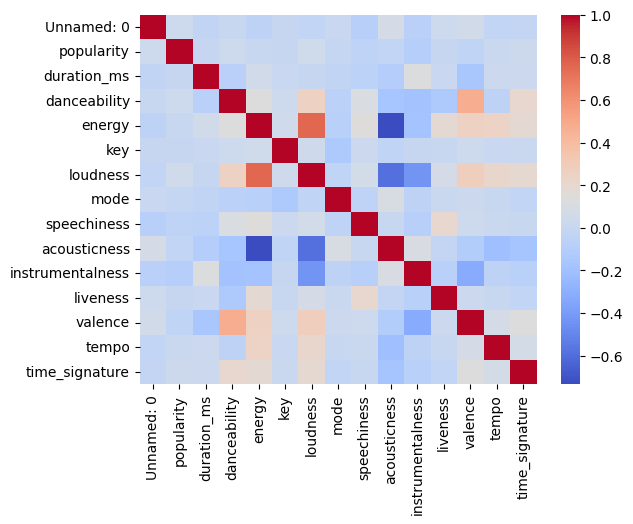

In [9]:
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

In [10]:
popularity_duration_corr = correlation_matrix.loc['popularity', 'duration_ms']
print(f"Корреляция между популярностью и длительностью трека: {popularity_duration_corr}")

Корреляция между популярностью и длительностью трека: -0.007101208619703797


#### Заметим, что значимых корреляций, помимо "энергии" и "шумности" не обнаружено. Уже на данном этапе можно сделать несколько гипотез касательно будущих моделей

### Гипотеза 1:
Популярность трека зависит от "скрытых" связей, существующих между обьективными музыкальными параметрами. Скажем, определенная совокупность темпа, шумности, жанра гарантирует треку всенародную любовь и признание. Это может обосновывать отсутствие значимых корреляций

### Гипотеза 2:
Популярность трека является, скорее, залогом известного имени. Трек с большей вероятностью станет популярным, если он был выпущен супер-звездой, особенно - если внутри успешного музыкального альбома

### Оставим проверку этих гипотез на "сладкое", пройдёмся по более насущным

#### Гипотеза 1: Короткие треки популярнее длинных

### Взглянем на гистограмму соотношения популярности трека и его продолжительности:


In [11]:
soundframe['duration_sec'] = soundframe['duration_ms'] / 10000

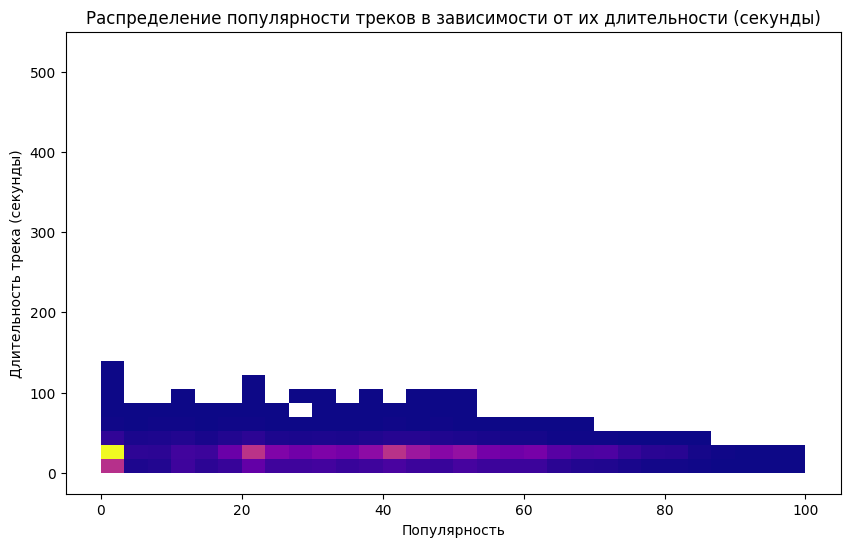

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=soundframe, y='duration_sec', x='popularity', bins=30, pthresh=0.001, cmap='plasma')
plt.title('Распределение популярности треков в зависимости от их длительности (секунды)')
plt.ylabel('Длительность трека (секунды)')
plt.xlabel('Популярность')
plt.show()

Большинство треков имеют длительность менее 100 секунд и популярность менее 20.

Треки с длительностью около 200 секунд также имеют некоторое количество популярных треков, но их популярность не так велика, как у более коротких треков.

#### Гипотеза в целом подтверждена

### Гипотеза 2: Музыка, содержащая эксплицитную лексику в среднем является менее популярной

C:\Users\FelixShuic\AppData\Local\Temp\ipykernel_4020\1837851365.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sound_grouped = sound_copy.groupby(['popularity_bin', 'explicit']).size().unstack(fill_value=0)


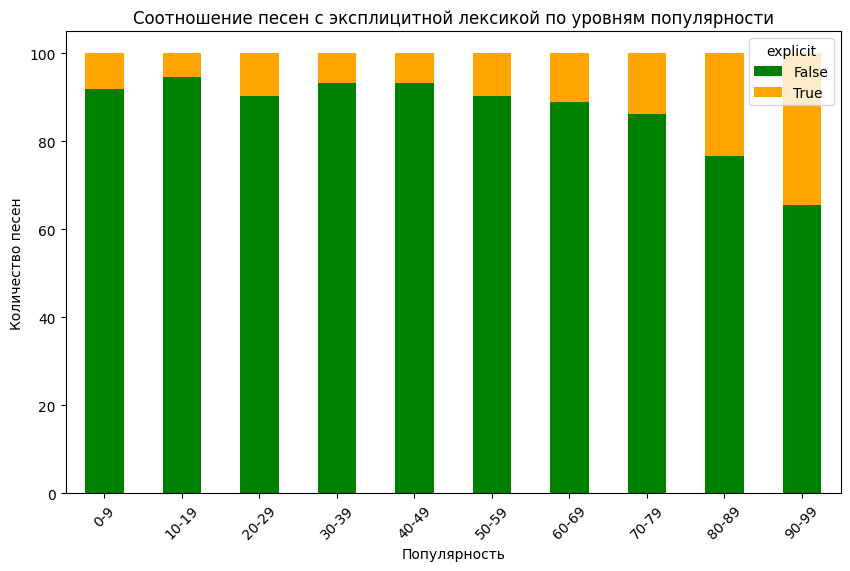

In [13]:
sound_copy = soundframe.copy()
sound_copy['popularity_bin'] = pd.cut(soundframe['popularity'], bins=range(0, 110, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
sound_grouped = sound_copy.groupby(['popularity_bin', 'explicit']).size().unstack(fill_value=0)
grouped_percent = sound_grouped.div(sound_grouped.sum(axis=1), axis=0) * 100
ax = grouped_percent.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'orange'])
ax.set_title('Соотношение песен с эксплицитной лексикой по уровням популярности')
ax.set_xlabel('Популярность')
ax.set_ylabel('Количество песен')
ax.set_xticklabels(sound_grouped.index, rotation=45)

plt.show()

#### Удивительно, но ближе к высоким значениям популярности эксплицитная лексика начинает встречаться заметно чаще
### Гипотеза подтверждена

### Гипотеза 3: Танцевальная музыка в среднем является самой популярной

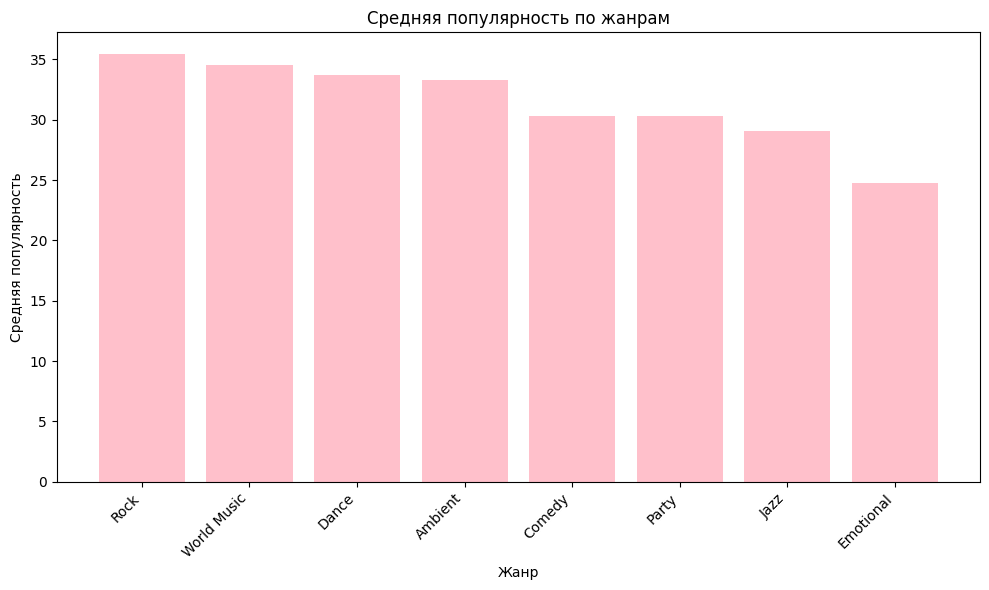

In [14]:
dataframes = {
    'Rock': r_sf_rock,
    'Dance': r_sf_dance,
    'World Music': r_sf_world_music,
    'Ambient': r_sf_ambient,
    'Comedy': r_sf_comedy,
    'Jazz': r_sf_jazz,
    'Emotional': r_sf_emotional,
    'Party': r_sf_party
}

average_popularity = {}

for genre, df in dataframes.items():
    avg_popularity = df['popularity'].mean()
    average_popularity[genre] = avg_popularity

popularity_df = pd.DataFrame(list(average_popularity.items()), columns=['Genre', 'Average Popularity'])

popularity_df = popularity_df.sort_values(by='Average Popularity', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(popularity_df['Genre'], popularity_df['Average Popularity'], color='pink')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.title('Средняя популярность по жанрам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

#### Самым популярным жанром оказались подвиды рока. Джазз и эмоциональная музыка оказались не в тренде.
### Гипотеза не подтверждена

За фолк обидно! Давайте проверим, может эмоциональную музыку "вниз" тянет какой - то конкретный поджанр?

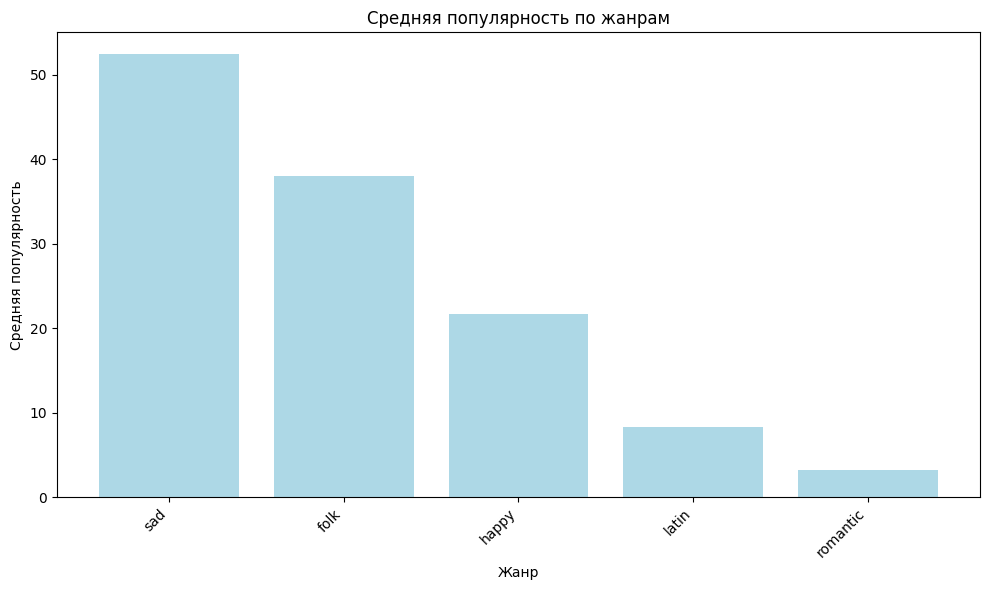

In [15]:
dataframes = {'romantic': sf_romance, 'sad': sf_sad, 'happy': sf_happy, 'latin': sf_latin, 'folk': sf_folk}
average_popularity = {}

for genre, df in dataframes.items():
    avg_popularity = df['popularity'].mean()
    average_popularity[genre] = avg_popularity

popularity_df = pd.DataFrame(list(average_popularity.items()), columns=['Genre', 'Average Popularity'])

popularity_df = popularity_df.sort_values(by='Average Popularity', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(popularity_df['Genre'], popularity_df['Average Popularity'], color='lightblue')
plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.title('Средняя популярность по жанрам')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

### Гипотеза подтверждена! Фолк действительно показывает результаты выше среднего, тогда как latin и romantic оказались наименее востребованными

### Гипотеза 4: Люди слушают музыку чтобы заполнить пустоту в голове, поэтому чем музыка громче - тем она популярнее!

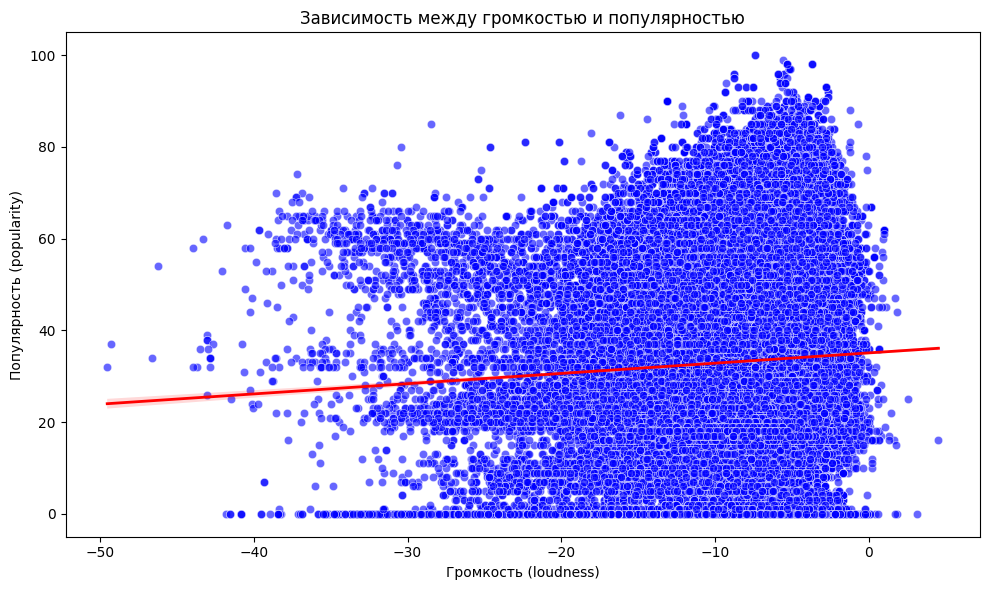

Корреляция между громкостью и популярностью: 0.050423036100497774


In [16]:
plt.figure(figsize=(10, 6))
df = soundframe.copy()
sns.scatterplot(x='loudness', y='popularity', data=df, color='blue', alpha=0.6)

sns.regplot(x='loudness', y='popularity', data=df, scatter=False, color='red', line_kws={'linewidth': 2})

plt.title('Зависимость между громкостью и популярностью')
plt.xlabel('Громкость (loudness)')
plt.ylabel('Популярность (popularity)')
plt.tight_layout()
plt.show()
correlation = df['loudness'].corr(df['popularity'])
print(f'Корреляция между громкостью и популярностью: {correlation}')

#### Видим незначительную положительную корреляцию, о подтверждении гипотезы говорить нельзя

Уже сейчас заметно видно, что статистические данные искажаются довольно сильно песнями с практический нулевой популярностью. Эффект вносят и никому неизвестные авторы, написавшие 1-2 песни, поэтому самое время перейти к технической работе над данными

# Feature engineering и преобразование к One Hot Encoding


## threshold популярности

Добавим параметр, отражающий то, переходит ли трек медианный параметр популярности. Он будет равен 1, если популярность выше 22 - и 0 если нет.

In [17]:
soundframe['popularity_threshold'] = (soundframe['popularity'] > soundframe['popularity'].median()).astype(int)

Посмотрим, в каких жанрах чаще всего треки переходят линию отсечки

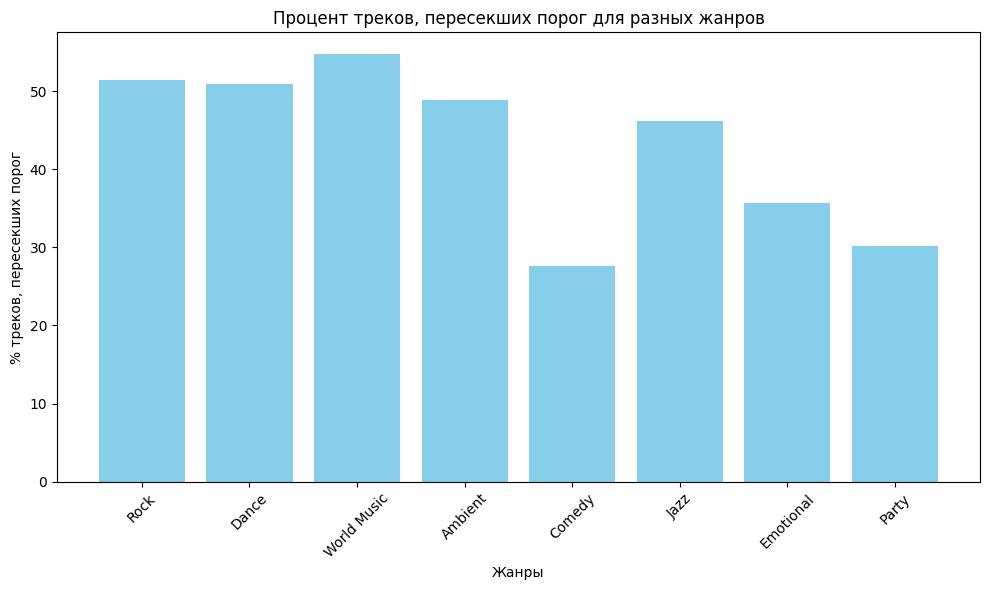

In [23]:
dataframes = {
    'Rock': r_sf_rock,
    'Dance': r_sf_dance,
    'World Music': r_sf_world_music,
    'Ambient': r_sf_ambient,
    'Comedy': r_sf_comedy,
    'Jazz': r_sf_jazz,
    'Emotional': r_sf_emotional,
    'Party': r_sf_party
}
percent_over_threshold = {}

for genre, df in dataframes.items():
    percent_over_threshold[genre] = df['popularity_threshold'].mean() * 100
plt.figure(figsize=(10, 6))
plt.bar(percent_over_threshold.keys(), percent_over_threshold.values(), color='skyblue')
plt.xlabel('Жанры')
plt.ylabel('% треков, пересекших порог')
plt.title('Процент треков, пересекших порог для разных жанров')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Как выяснилось, не смотря на то, что рок оказался самым популярным жанром, наибольшее число "качественных" треков оказалось именно среди мировой музыки

## Solo author или music band?

Можно сделать предположение, что имена исполнителей чаще записываются в виде двух слов(имени, отчества в англо-американской традиции), тогда как музыкальные группы - одно запоминающеся слово(если убрать артикль 'THE' )
Для начала добавим просто показатель, содержащий количество слов в названии. Беглый анализ датасета показывает, что зачастую в качестве разделителей в названии используется либо ' ', либо ';'

In [28]:
soundframe['artist_len'] = soundframe['artists'].fillna('').apply(lambda x: len(x.replace(';', ' ').split()) if isinstance(x, str) else 0)
print(soundframe['artist_len'].head(10))

0    2
1    2
2    3
3    2
4    2
5    2
6    6
7    2
8    4
9    2
Name: artist_len, dtype: int64


In [31]:
print(soundframe.groupby('artist_len').count())
grouped = soundframe.groupby('artist_len').count()

            Unnamed: 0  track_id  artists  album_name  track_name  popularity  \
artist_len                                                                      
0                    1         1        0           0           0           1   
1                25034     25034    25034       25034       25034       25034   
2                47326     47326    47326       47326       47326       47326   
3                17515     17515    17515       17515       17515       17515   
4                12221     12221    12221       12221       12221       12221   
5                 4892      4892     4892        4892        4892        4892   
6                 2807      2807     2807        2807        2807        2807   
7                 1539      1539     1539        1539        1539        1539   
8                  954       954      954         954         954         954   
9                  490       490      490         490         490         490   
10                 323      

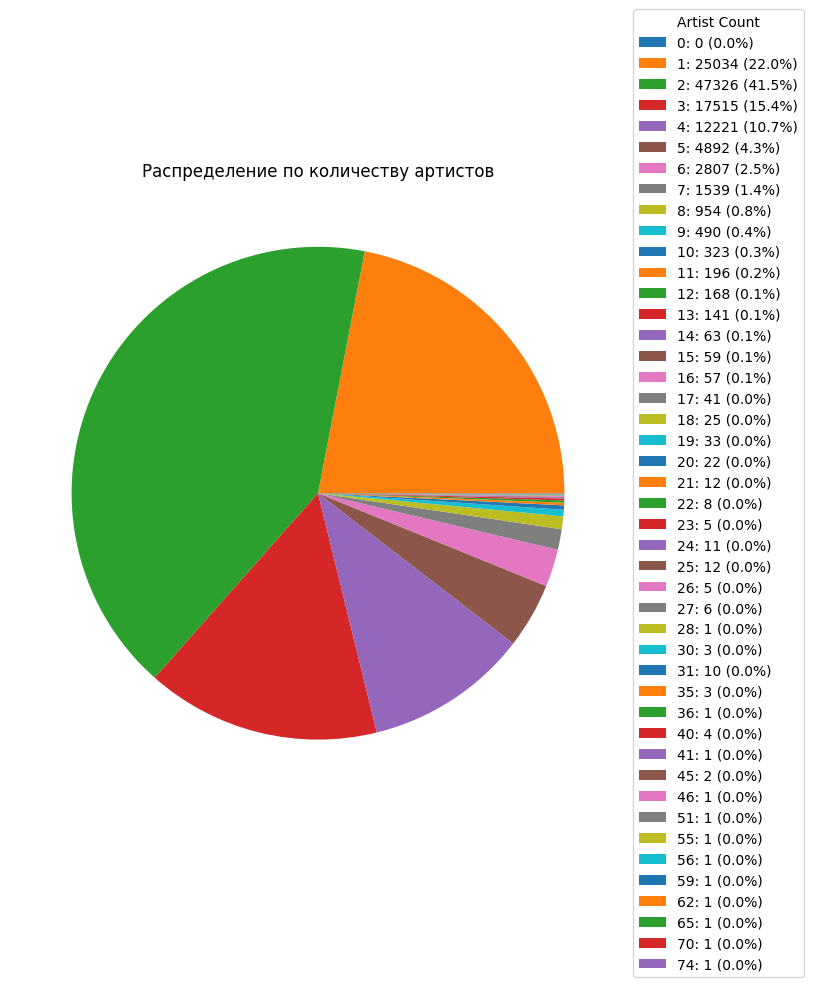

In [41]:
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(grouped['artists'], labels=None, autopct='')

plt.legend(wedges, [f'{grouped.index[i]}: {grouped["artists"].iloc[i]} ({grouped["artists"].iloc[i] / grouped["artists"].sum() * 100:.1f}%)' for i in range(len(grouped))], title="Artist Count", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('Распределение по количеству артистов')

plt.show()

#### В целом гипотеза подтверждается, явный перевес в пользу исполнителей с названием из двух слов свидетельствует о том, что вероятнее всего это их first и second name, можно сделать дискриминационный показатель, который будет равен 1, если artists name имеет 2 слова

In [43]:
soundframe['solo_artist'] = (soundframe['artist_len'] == 2).astype(int)
print(soundframe['solo_artist'].head(10))

0    1
1    1
2    0
3    1
4    1
5    1
6    0
7    1
8    0
9    1
Name: solo_artist, dtype: int64


Очевидно, нейронная сеть будет кушать только числа. Если мы напрямую преобразуем буквы в числа, то нейронная сеть будет считать что одно слово
превалирует над другим, или даже найдет ложные корреляции. Для избежания данных проблем используется OHE - кодировка параметров двух видов. В случае категориального признака - OHE dummies, в случае текста - векторизация

In [ ]:
#выберем размерность вектора для кодирования исполнителей
print(soundframe['artists'].nunique())
#Вектор такой размерности будет неоптимально использовать вычислительную мощность, необходима предварительная дообработка

Почистим артистов, не написавших как минимум 6 песен

In [ ]:
artists_counter = soundframe['artists'].value_counts()
artists_to_replace = artists_counter[artists_counter < 6].index
#Альбомы таких непродуктивных исполнителей тоже затрём
soundframe.loc[soundframe['artists'].isin(artists_to_replace), ['artists', 'album_name']] = np.nan
print(soundframe['artists'].nunique())

In [ ]:
#С этим уже можно работать. Кодируем.

In [ ]:
album_encoder = OneHotEncoder()
artist_encoder = OneHotEncoder()
genre_encoder = OneHotEncoder()

In [ ]:
album_OHE = album_encoder.fit_transform(soundframe[['album_name']])
artist_OHE = artist_encoder.fit_transform(soundframe[['artists']])
genre_OHE = genre_encoder.fit_transform(soundframe[['track_genre']])

dense_album = album_OHE.toarray()
dense_artist = artist_OHE.toarray()
dense_genre = genre_OHE.toarray()

soundframe['album_ohe'] = dense_album
soundframe['artist_ohe'] = dense_artist
soundframe['genre_ohe'] = dense_genre

In [ ]:
encoder = OneHotEncoder()
soundframe['track_genre']

In [ ]:
soundframe.head(10)

#### Поделим на обучающие данные

In [ ]:
train_sounds, test_sounds = train_test_split(soundframe, test_size=0.5, stratify=soundframe['genre'], random_state=42)

In [ ]:
train_sounds.head(3)